In [29]:
## General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv("~/Coding/drivendata/pump-it-up/data/df_clean.csv")
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   gps_height             59400 non-null  float64
 2   installer              59400 non-null  object 
 3   private_conn           59400 non-null  int64  
 4   basin                  59400 non-null  object 
 5   region                 59400 non-null  object 
 6   population             59400 non-null  float64
 7   public_meeting         59400 non-null  float64
 8   permit                 59400 non-null  float64
 9   extraction_type_class  59400 non-null  object 
 10  management_group       59400 non-null  object 
 11  payment_type           59400 non-null  object 
 12  quality_group          59400 non-null  object 
 13  quantity_group         59400 non-null  object 
 14  source_type            59400 non-null  object 
 15  wa

None

,id,gps_height,private_conn,population,public_meeting,permit,month_recorded,rainy_season,age_yrs
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,1057.545585,0.012744,288.198695,0.802643,0.602626,4.375640,0.499630,13.633889
std,21453.128371,507.785910,0.112169,461.673811,0.520257,0.585123,3.029247,0.500004,10.560510
min,0.000000,-90.000000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000
25%,18519.750000,838.000000,0.000000,80.000000,1.000000,0.000000,2.000000,0.000000,7.000000
50%,37061.500000,1057.545585,0.000000,200.000000,1.000000,1.000000,3.000000,0.000000,11.000000
75%,55656.500000,1350.981707,0.000000,410.000000,1.000000,1.000000,7.000000,1.000000,17.000000
max,74247.000000,2770.000000,1.000000,30500.000000,1.000000,1.000000,12.000000,1.000000,53.000000


# Data visualization

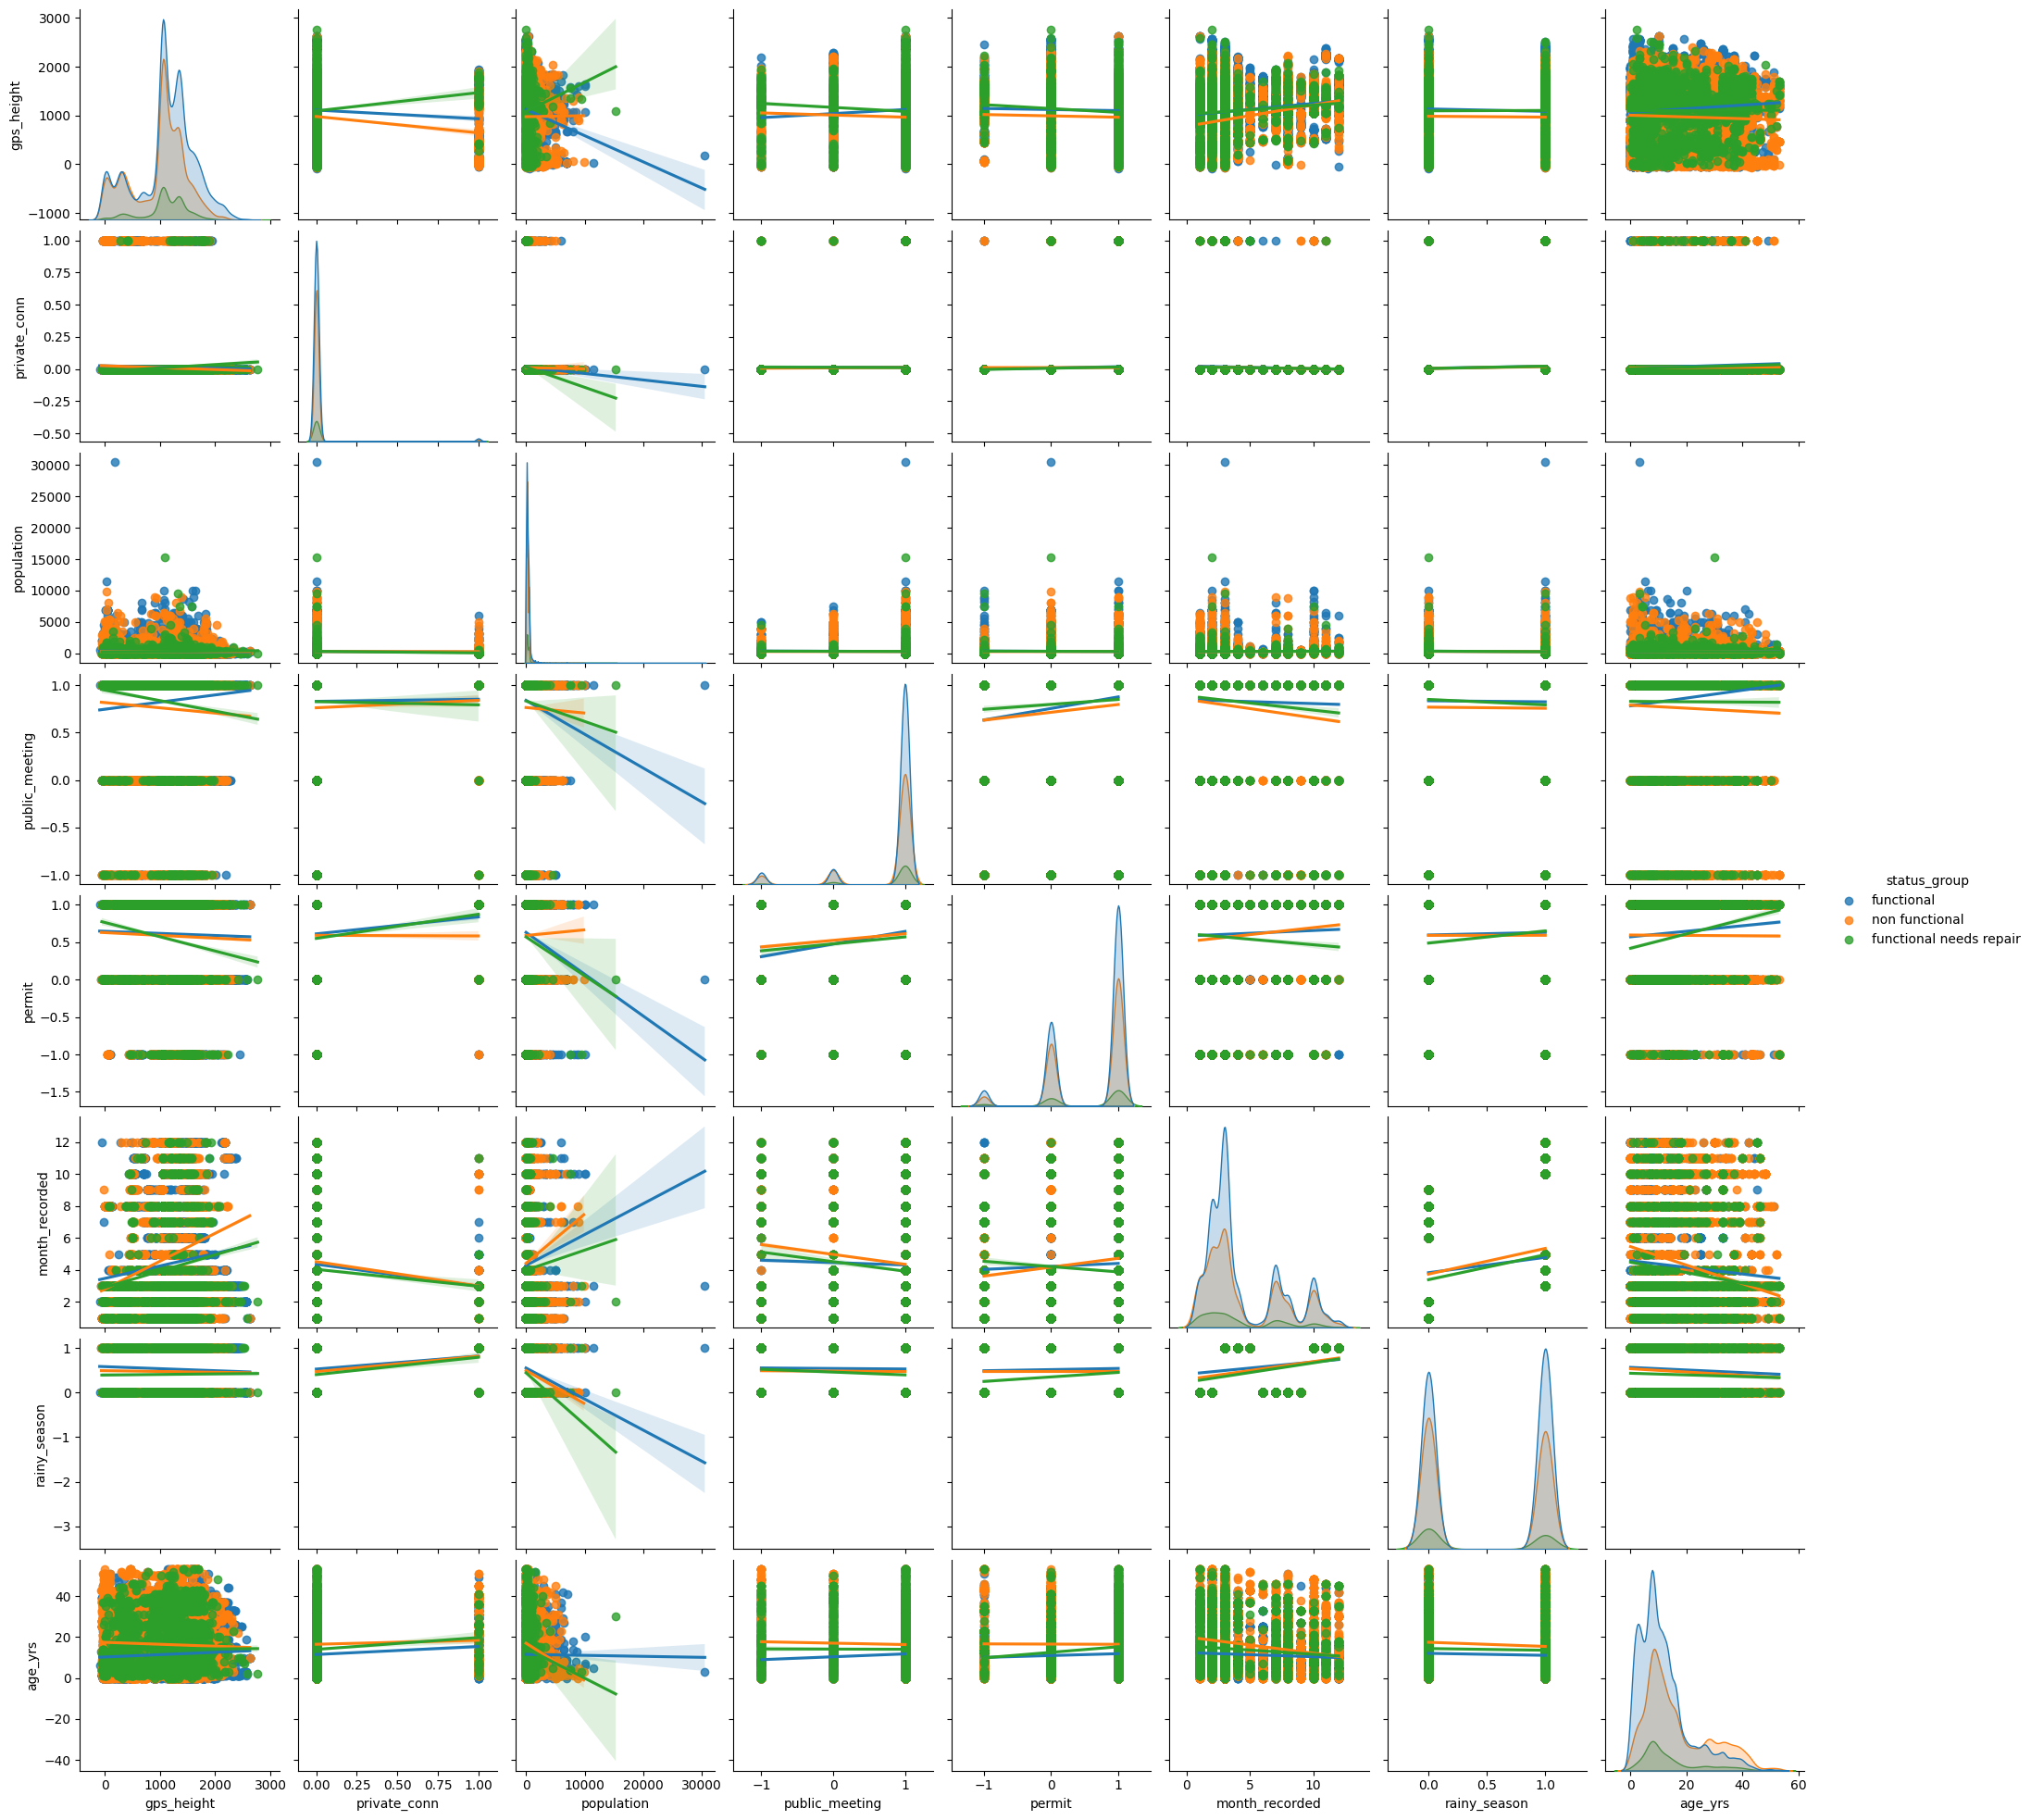

In [31]:
sns.pairplot(
    data=df,
    vars=df.select_dtypes(include=['float', 'int']).drop('id', axis=1),
    hue='status_group',
    kind='reg'
)
plt.show()

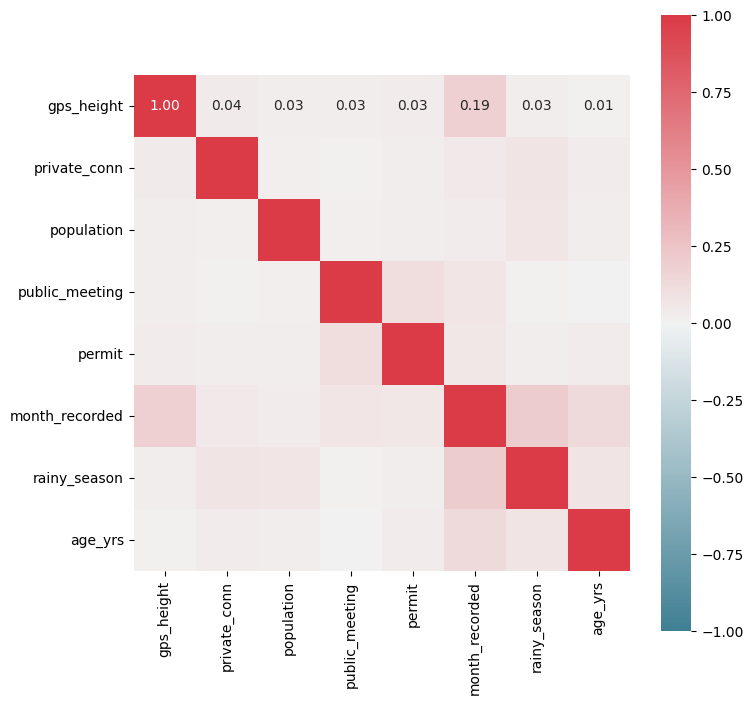

In [53]:
# corr_matr = df.select_dtypes(include=['float', 'int']).drop('id', axis=1).corr()
corr_matr = np.abs(df.drop('id', axis=1).corr(numeric_only=True))

fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(
    data=corr_matr,
    fmt='.2f',
    annot=corr_matr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),#'RdBu_r',
    square=True,
    vmin=-1,
    vmax=1
)

plt.show()

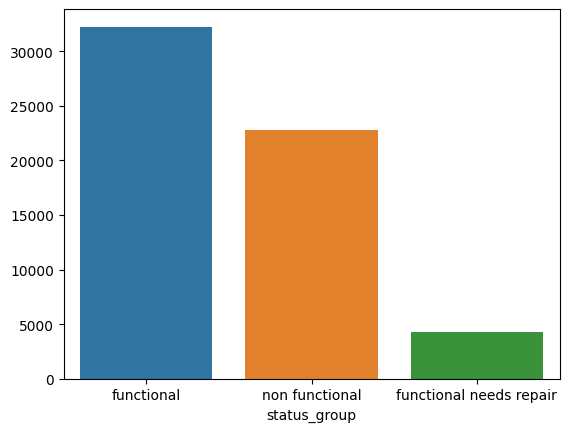

In [32]:
sns.barplot(
    x=df.status_group.value_counts().index,
    y=df.status_group.value_counts().values
)

plt.show()

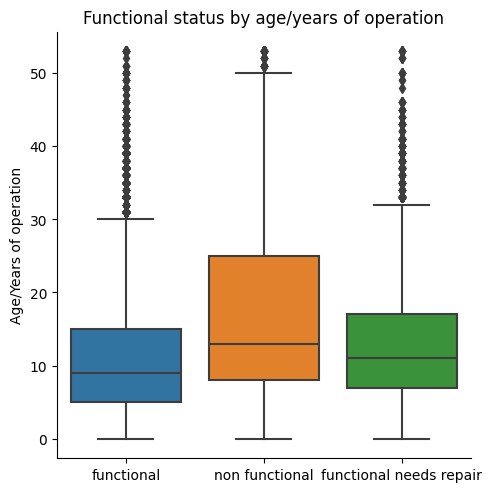

In [35]:
sns.catplot(
    data=df,
    x='status_group',
    y='age_yrs',
    # palette='Blues_d',
    kind='box',
)

plt.title('Functional status by age/years of operation')
plt.xlabel('')
plt.ylabel('Age/Years of operation')

plt.show()

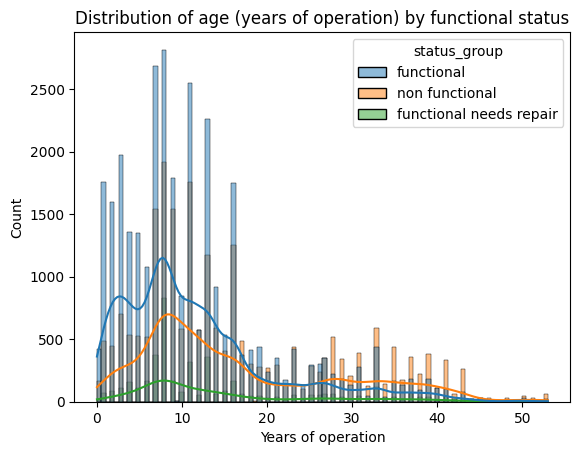

In [5]:
sns.histplot(
    data=df,
    x='age_yrs',
    hue='status_group',
    kde=True,
)

plt.title('Distribution of age (years of operation) by functional status')
plt.xlabel('Years of operation')
plt.ylabel('Count')

plt.show()

Comments:

- As expected, the average age of a non-functional/needs-repair water point is higher than the one of a functional water point.
- The average age of a non-functional/semi-functional water point is between 15 and 20 years, while the average age of a functional water point is less than 10 years.
- When a water point is >= 20 years old it is most likely to be non-functional.

In [6]:
df.groupby(['basin']).agg({'id':'count'}).reset_index().rename(columns={'id': 'total'})

,basin,total
0,Internal,7785
1,Lake Nyasa,5085
2,Lake Rukwa,2454
3,Lake Tanganyika,6432
4,Lake Victoria,10248
5,Pangani,8940
6,Rufiji,7976
7,Ruvuma / Southern Coast,4493
8,Wami / Ruvu,5987


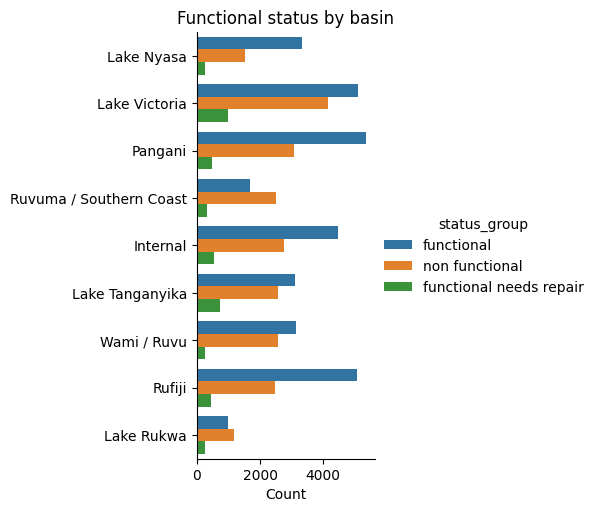

In [7]:
sns.catplot(
    data=df,
    y='basin',
    hue='status_group',
    kind='count',
)

plt.title('Functional status by basin')
plt.xlabel('Count')
plt.ylabel('')

plt.show()

Comments:

- There are two hydrological basins where functional water points are less than non-functional/semi-functional water points, namely Ruvuma/Southern Coast and Lake Rukwa.
- Rufiji basin is the one with the highest proportion of functional points.

In [22]:
df.groupby(['region']).agg({'id':'count'}).reset_index().rename(columns={'id': 'total'})

,region,total
0,Arusha,3350
1,Dar es Salaam,805
2,Dodoma,2201
3,Iringa,5294
4,Kagera,3316
5,Kigoma,2816
6,Kilimanjaro,4379
7,Lindi,1546
8,Manyara,1583
9,Mara,1969


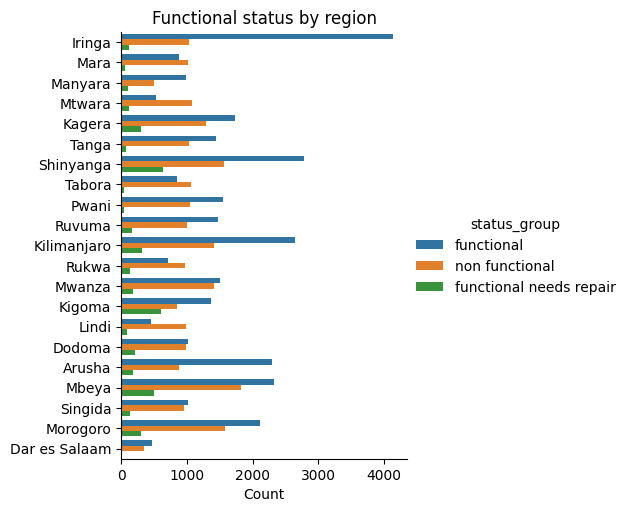

In [23]:
sns.catplot(
    data=df,
    y='region',
    hue='status_group',
    kind='count',
)

plt.title('Functional status by region')
plt.xlabel('Count')
plt.ylabel('')

plt.show()

Comments:

- Mara, Mtwara, Tabora, Rukwa, and Lindi are the regions where the number of non-functional water points is higher than the number of functional ones.

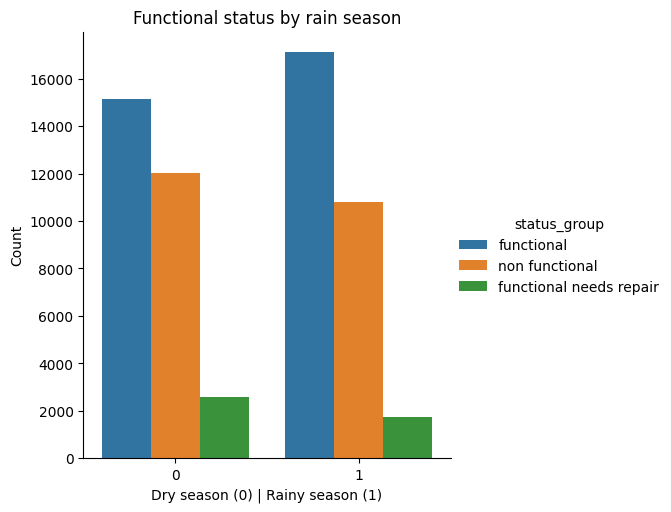

In [8]:
sns.catplot(
    data=df,
    x='rainy_season',
    hue='status_group',
    kind='count',
)

plt.title('Functional status by rain season')
plt.ylabel('Count')
plt.xlabel('Dry season (0) | Rainy season (1)')

plt.show()

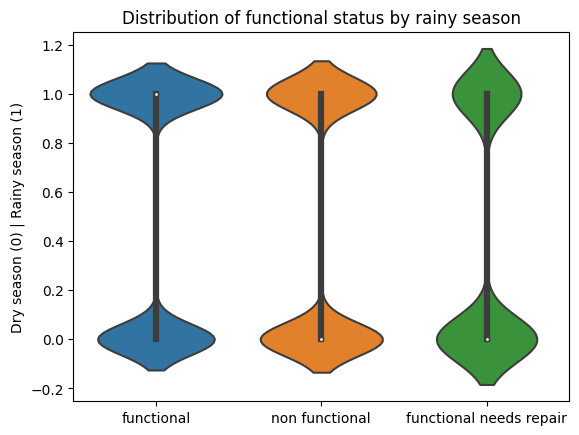

In [43]:
sns.violinplot(
    data=df,
    x='status_group',
    y='rainy_season',
)

plt.title('Distribution of functional status by rainy season')
plt.ylabel('Dry season (0) | Rainy season (1)')
plt.xlabel('')

plt.show()

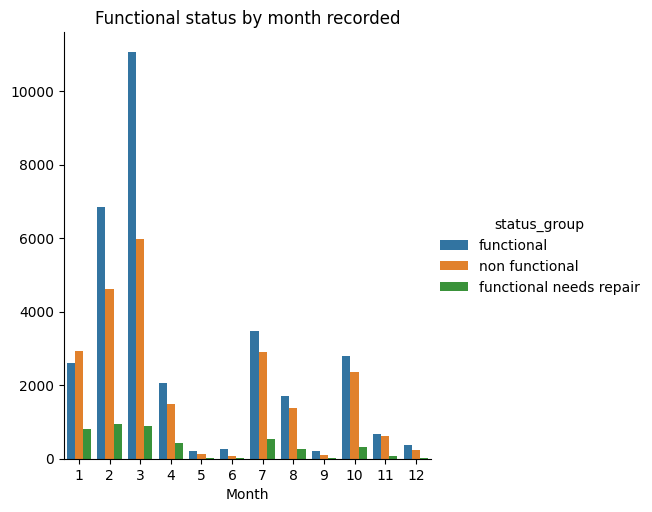

In [9]:
sns.catplot(
    data=df,
    hue='status_group',
    x='month_recorded',
    # palette='Blues_d',
    kind='count',
)

plt.title('Functional status by month recorded')
plt.ylabel('')
plt.xlabel('Month')

plt.show()


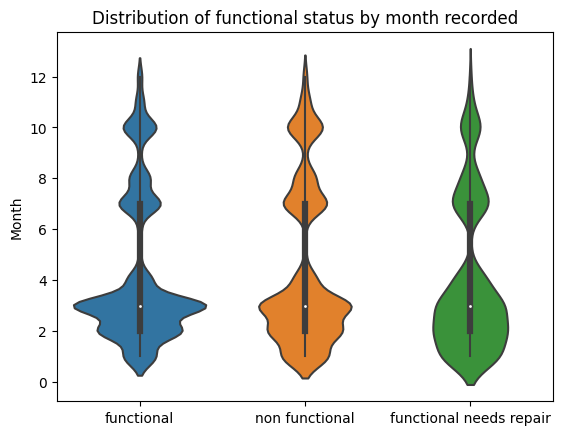

In [42]:
sns.violinplot(
    data=df,
    x='status_group',
    y='month_recorded',
)

plt.title('Distribution of functional status by month recorded')
plt.ylabel('Month')
plt.xlabel('')

plt.show()

Comments:

- There is very little variability of reported functional vs. non-functional points during rainy or dry season.
- Most of the assessments are conducted in Feb/Mar.

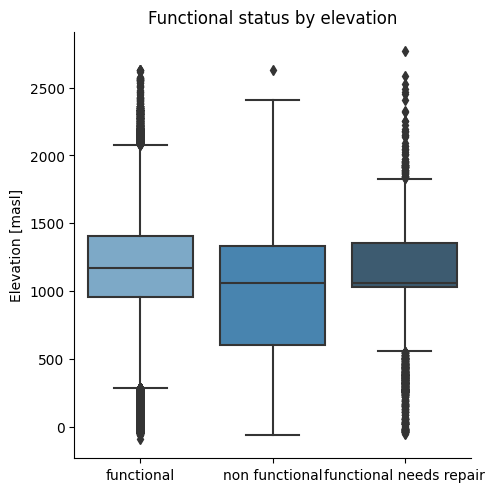

In [10]:
sns.catplot(
    data=df,
    x='status_group',
    y='gps_height',
    palette='Blues_d',
    kind='box',
)

plt.title('Functional status by elevation')
plt.xlabel('')
plt.ylabel('Elevation [masl]')

plt.show()

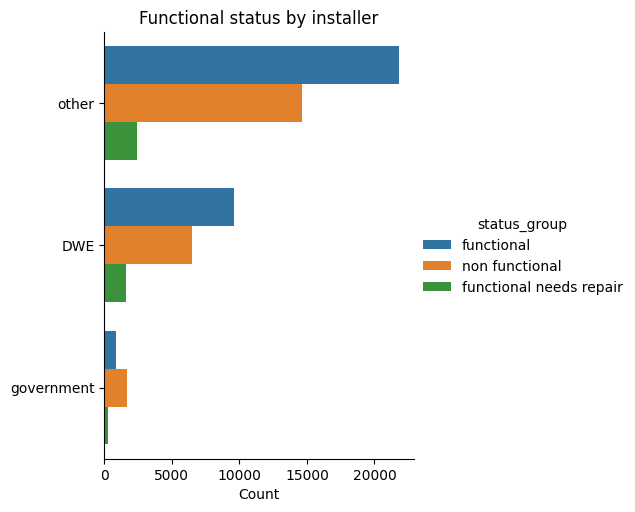

In [11]:
sns.catplot(
    data=df,
    y='installer',
    hue='status_group',
    kind='count',
)

plt.title('Functional status by installer')
plt.xlabel('Count')
plt.ylabel('')

plt.show()

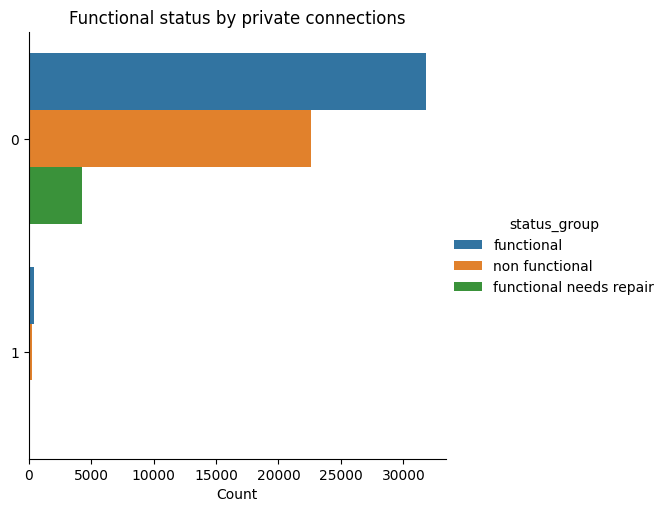

In [12]:
sns.catplot(
    data=df,
    y='private_conn',
    hue='status_group',
    kind='count',
)

plt.title('Functional status by private connections')
plt.xlabel('Count')
plt.ylabel('')

plt.show()

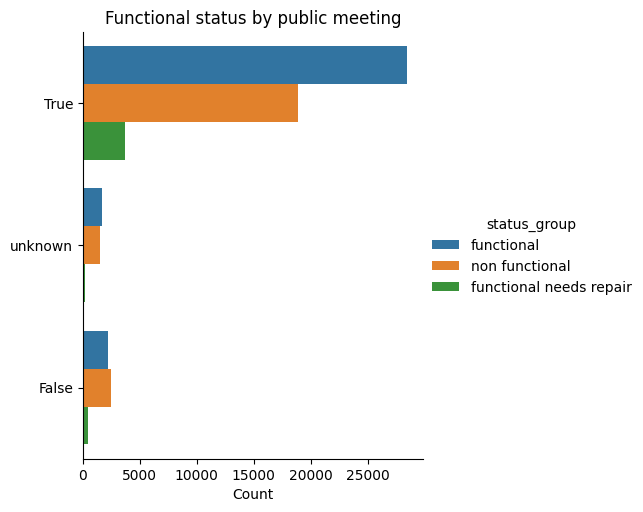

In [13]:
sns.catplot(
    data=df,
    y='public_meeting',
    hue='status_group',
    kind='count',
)

plt.title('Functional status by public meeting')
plt.xlabel('Count')
plt.ylabel('')

plt.show()

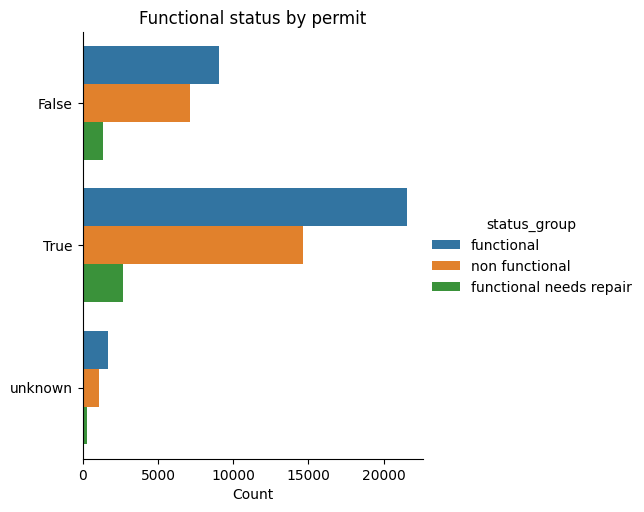

In [14]:
sns.catplot(
    data=df,
    y='permit',
    hue='status_group',
    kind='count',
)

plt.title('Functional status by permit')
plt.xlabel('Count')
plt.ylabel('')

plt.show()

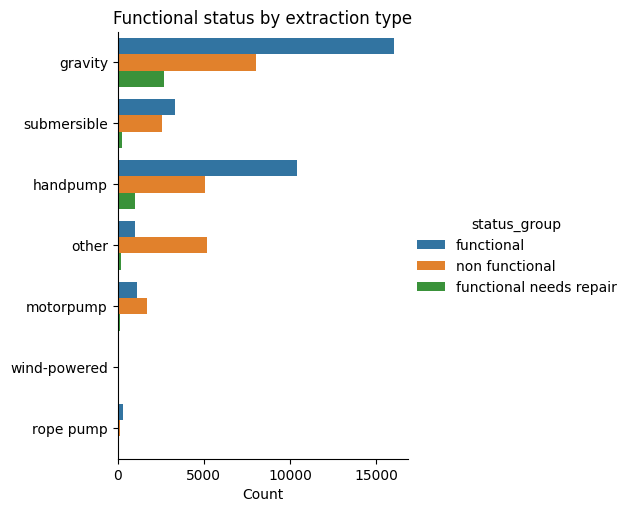

In [15]:
sns.catplot(
    data=df,
    y='extraction_type_class',
    hue='status_group',
    kind='count',
)

plt.title('Functional status by extraction type')
plt.xlabel('Count')
plt.ylabel('')

plt.show()

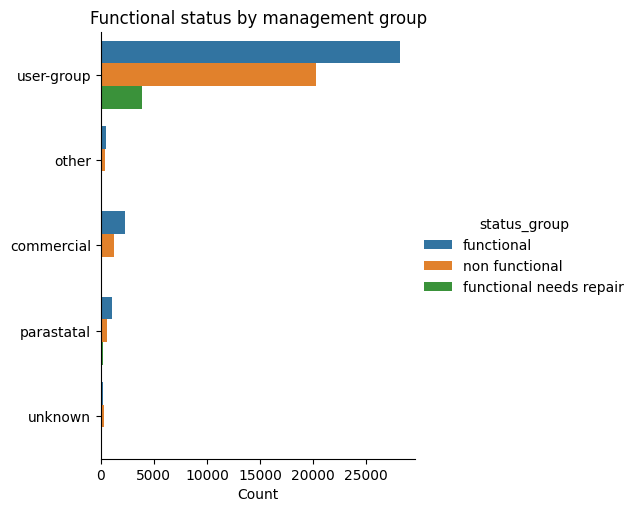

In [16]:
sns.catplot(
    data=df,
    y='management_group',
    hue='status_group',
    kind='count',
)

plt.title('Functional status by management group')
plt.xlabel('Count')
plt.ylabel('')

plt.show()

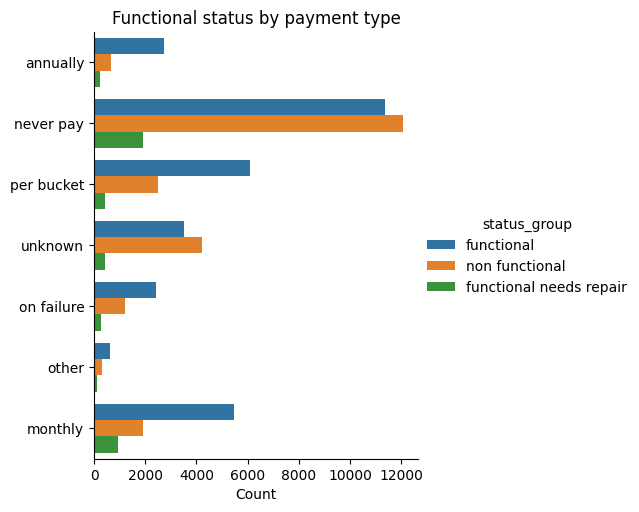

In [17]:
sns.catplot(
    data=df,
    y='payment_type',
    hue='status_group',
    kind='count',
)

plt.title('Functional status by payment type')
plt.xlabel('Count')
plt.ylabel('')

plt.show()

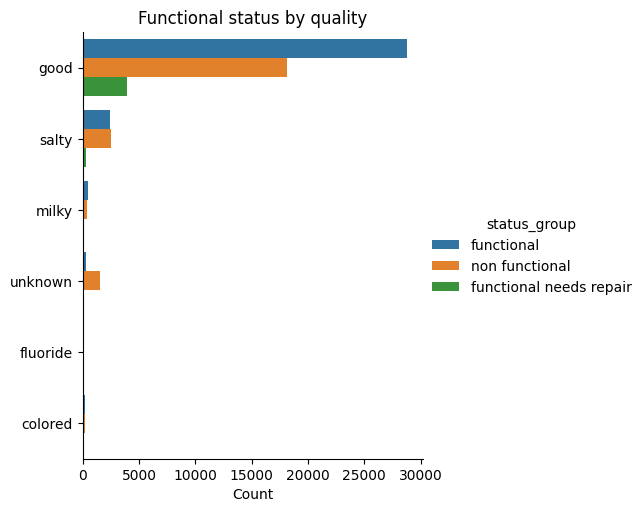

In [18]:
sns.catplot(
    data=df,
    y='quality_group',
    hue='status_group',
    kind='count',
)

plt.title('Functional status by quality')
plt.xlabel('Count')
plt.ylabel('')

plt.show()

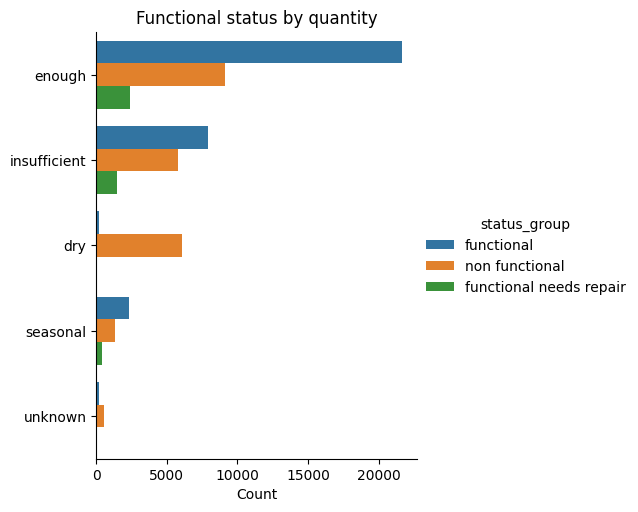

In [19]:
sns.catplot(
    data=df,
    y='quantity_group',
    hue='status_group',
    kind='count',
)

plt.title('Functional status by quantity')
plt.xlabel('Count')
plt.ylabel('')

plt.show()

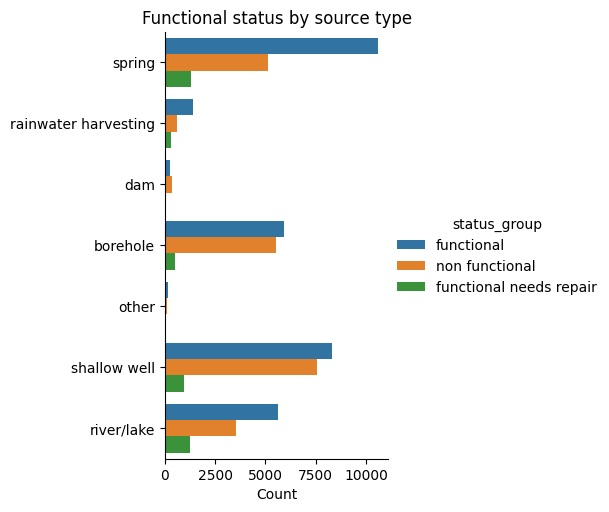

In [20]:
sns.catplot(
    data=df,
    y='source_type',
    hue='status_group',
    kind='count',
)

plt.title('Functional status by source type')
plt.xlabel('Count')
plt.ylabel('')

plt.show()

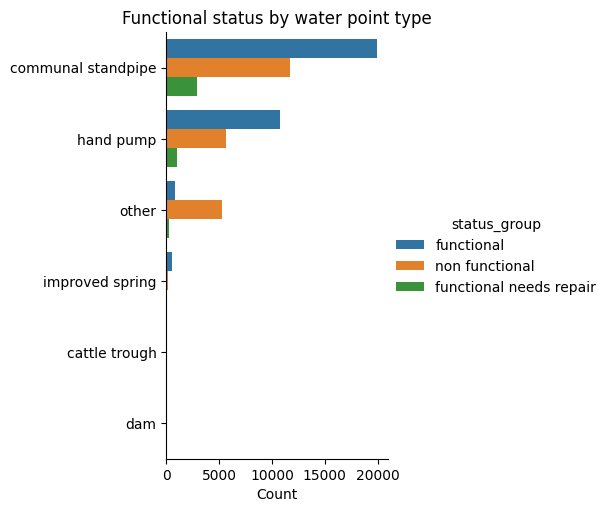

In [21]:
sns.catplot(
    data=df,
    y='waterpoint_type_group',
    hue='status_group',
    kind='count',
)

plt.title('Functional status by water point type')
plt.xlabel('Count')
plt.ylabel('')

plt.show()

Comments:

- The elevation has not much influence on the functional status of a water point.
- There is no apparent influence of the installer on the functional status of the water point, althought of the total schemes installed by government(s) the total number of the non-functional points is higher than the functional ones.
- There is no apparent influence of the private connections on the functional status of the water point.
- There is no apparent influence of the public meeting on the functional status of the water point, althought among the schemes that have not held public meetings there are more non-functional ones.
- There is no apparent influence of the permit on the functional status of the water point.
- Motorpump and other extraction types, have more more non-functional points than functional ones. Also submerible types have high percentage of non-functionality.
- There is no apparent influence of the management group type on the functional status of the water point.
- Schemes without a payment policy have higher percentage of non-functional points than functional ones.
- Salty or unknown quality seems to negatively affect the functional status of a water point.
- Quantity group has an impact on the functionality.
- Type of source seems to have a minimal impact on the functionality. This information is somehow reflected already in the type of extraction field.
- Other water point type have higher incidence of non-functional points.
